# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [43]:
# Installing the libraries with the specified version.
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q

Note: you may need to restart the kernel to use updated packages.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [44]:
# Libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries for splitting test and train data
from sklearn.model_selection import train_test_split

## Loading the dataset

In [45]:
df = pd.read_csv("../data/Loan_Modelling.csv")
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [46]:
# Create a copy of the datase
df_original = df.copy()

## Data Overview

* Observations
* Sanity checks

In [47]:
df.shape
print(f"The imported dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The imported dataset has 5000 rows and 14 columns


There are 5000 rows and 14 columns in the given dataset.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All columns including zipcode are numeric.

In [49]:
# Checking for null values in the dataset
df.isnull().values.any()

False

There are no null values in the dataset.

In [50]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the above statistical summary:
- Min `Experience` has a negative value.
- Values in `Income`, `Age`, `CCAvg`, `Mortgage` variables look ok.
-  `ID` and `ZIPCode` can be dropped as they don't have any useful informaion.
- `Education`, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` are categorical columns.
- 90.1% customers didn't accept personal loan offer in the first compaign.
- Min age is 23, max age is 67, average age is 45 years.
- 90% of the customers don't have a security account.
- 94% of customers don't have a certificate of deposit account.


In [51]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

From above:
- There are 5000 unique values in ID and hence can be dropped.
- As confirmed earlier, `Securities_Account`, `CD_Account`, `Online`, `CreditCard` have only 2 categories of values (0 or 1)
- `Education` has 3 categories of values.
- `ZIPCode` has 467 different numerical values. External library is required to interpret the zip code number and if this is an important feature. We will drop this column.

In [52]:
# Dropping ID and ZipCode columns
df.drop('ID', axis= 1)
df.drop('ZIPCode', axis= 1)

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [53]:
# identify the categorical columns and numerical columns
columns = list(df)
categorical_columns = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
numerical_columns = ['Age' , 'Experience', 'Income', 'CCAvg', 'Mortgage']

### Univariate Analysis on Continuous variables

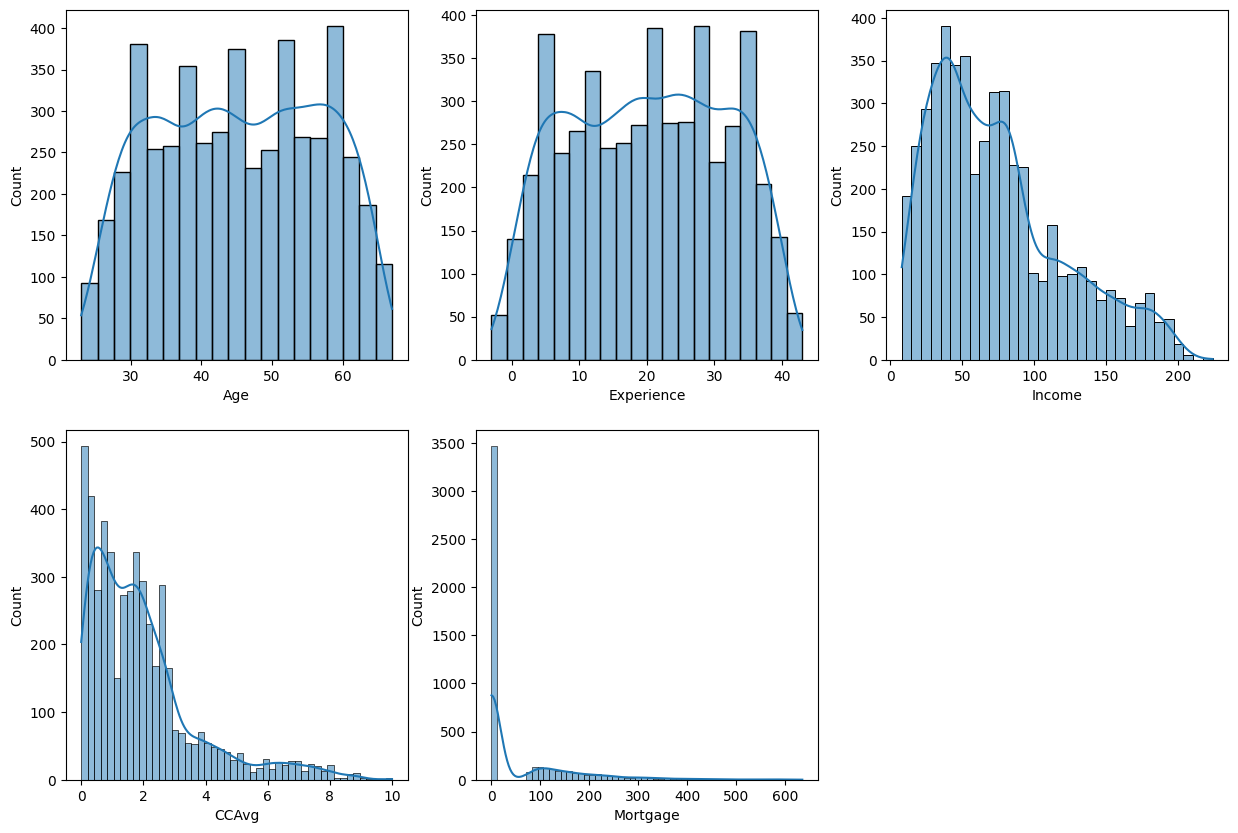

In [54]:
# Plot a histogram for all numerical values
fig=plt.figure(figsize=(15,10))
for i, numerical_column in enumerate(numerical_columns):
    fig.add_subplot(2,3,i+1)
    sns.histplot(data=df[numerical_column],
                 kde= True)

From above charts, we see that:
- `Age` and `Experience` are uniformly distributed and look identical and appears to be a strongly correlated. We will check the correlation between these 2 variables.
- `Income`, `CCAvg` and `Mortgage` are rightly skewed.
- `Mortgage` is rightly skewed showing that lot of people have a very low or no mortgage.

### Univariate Analysis for Categorical Variables

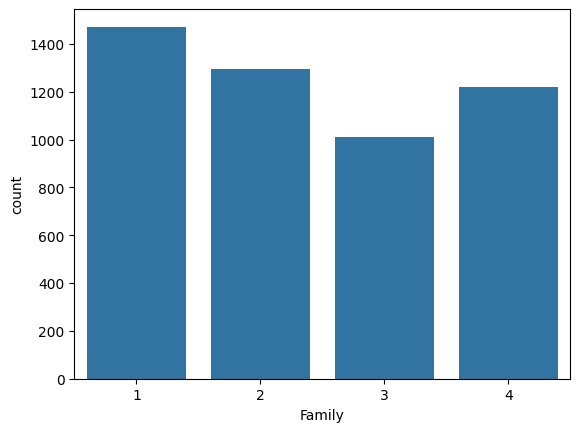

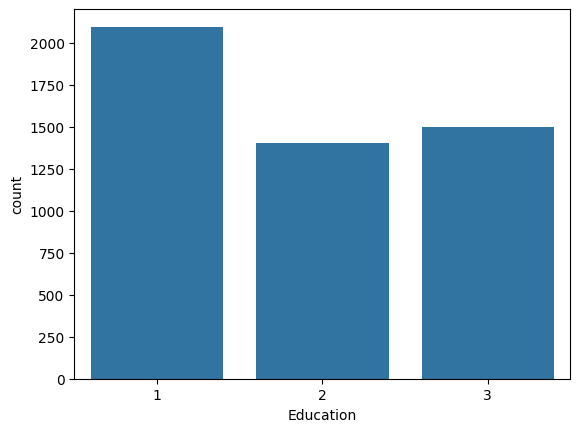

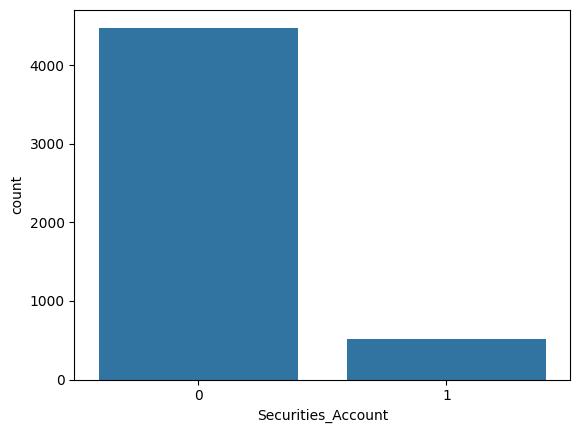

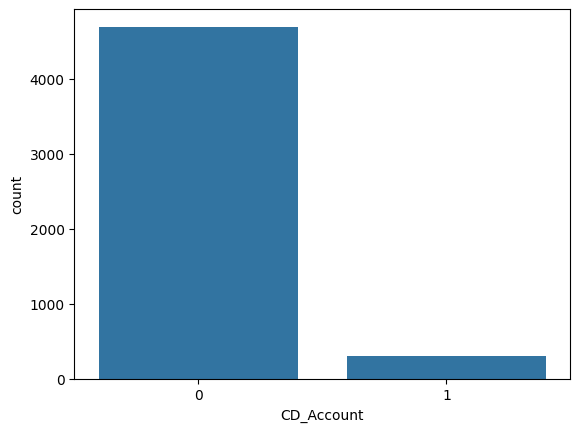

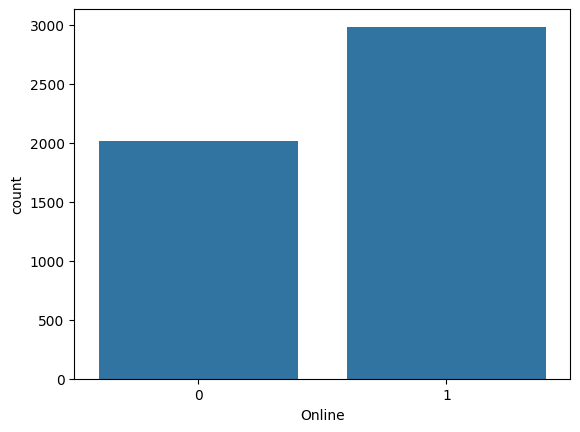

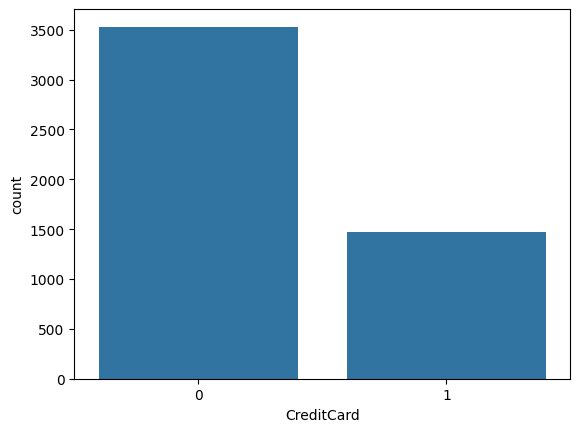

In [55]:
# Plotting count plots for categorical variables
for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.show()

Looking at the plots, we observe that:
- Majority of the customers don't have a credit card.
- Majority of the customers don't have a Certificate of Deposit with the bank.
- Majority of the customers are undergraduates.
- Majority of the customers have a family size 1 followed by family size of 4.

### Bivariate Analysis of numerical variables with target variable (personal loan)

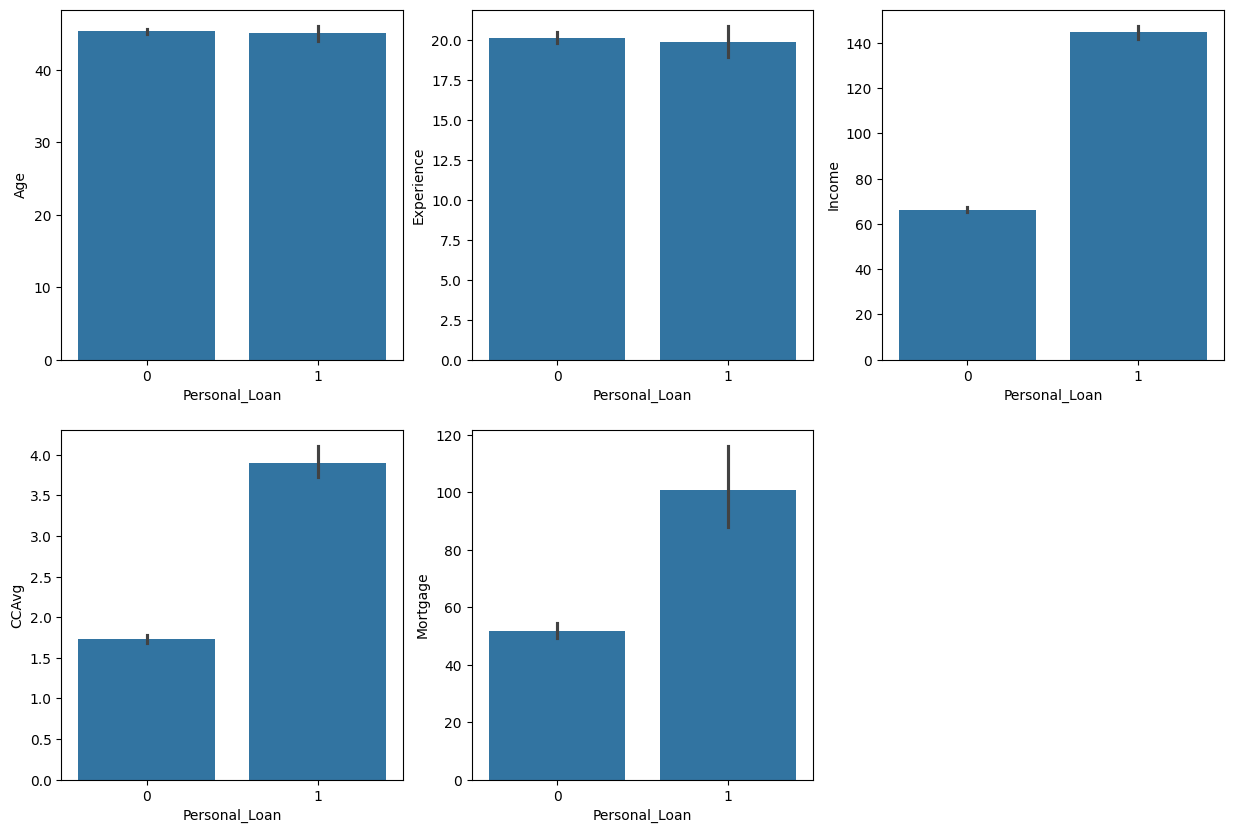

In [56]:
# Line plot to show relationship of personal loan with other variables
fig = plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.barplot( x = df['Personal_Loan'], y = df[col])

From above, we see that:
- Age and experience don't have much effect on personal loan.
- Customers with higher income are more likely to take personal loan.
- Customers with higher Average on credit cards are more likely to take personal loan.
- Customers with higher mortgage are more likely to take personal loan.

### Bivariate Analysis of categorical variables with target variable (personal loan)

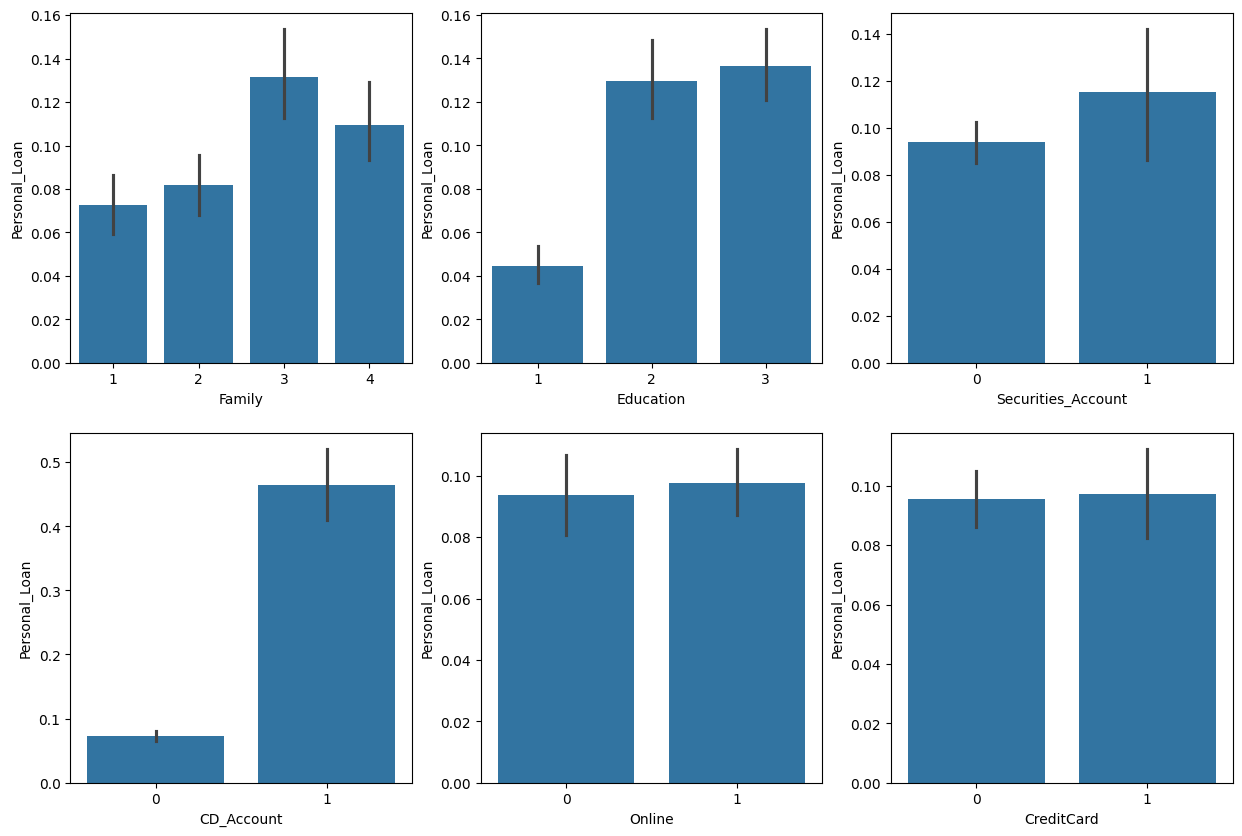

In [57]:
# Plotting bar plots of different categorical variables with personal loan
fig = plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_columns):
    ax = fig.add_subplot(2,3,i+1)
    sns.barplot( y = df['Personal_Loan'], x = df[col])

We observe that:
- Family with size 3 and 4 are more likely to take personal loan.
- Graduates and advanced/professionals are more likely to take personal loan.
- Customers who have certificate of deposit are more likely to take personal loan.
- Customers who have securities with the bank are more likely to take personal loan.

### Multivariate Analysis: Checking Data correlation

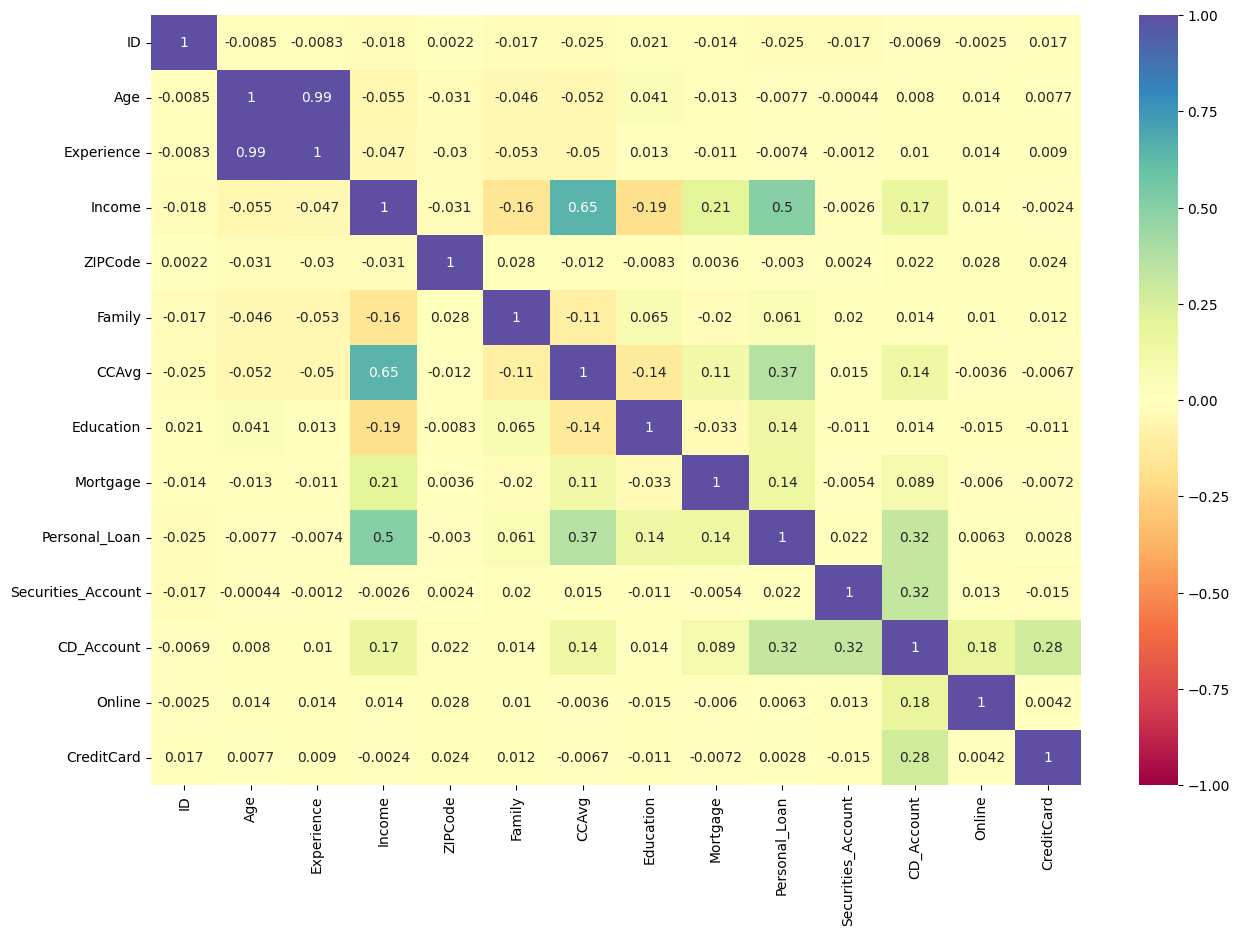

In [58]:
# Check the correlation between all variables
plt.figure(figsize=(15, 10))
sns.heatmap(
    data = df[columns].corr(),
    annot=True,
    cmap= "Spectral",
    vmin=-1,
    vmax=1,
)
plt.show()

From above plot, we observe that:
- Age is very strongly correlated (0.99) to experience. We can use either of the variables for model building.
- Income has a positive association with credit card spending.
- Other variables are very weakly related.

## Data Preprocessing

### Feature engineering

In [59]:
df.drop("Experience", axis=1, inplace=True)
numerical_columns.remove('Experience')

As we saw earlier, 
- `Experience` is very highly correlation with `Age`.
- The distribution is same as the distribution of `Age`.
Hence dropped `Experience` variable for model building.

### Missing value treatment

In [60]:
# Missing values treatment
df.isnull().values.any()

False

We already verified there are no missing values in any of the columns. 
However, some of `Experience` values are negative that doesn't look right as experience can't be negative.

### Outlier detection and treatment

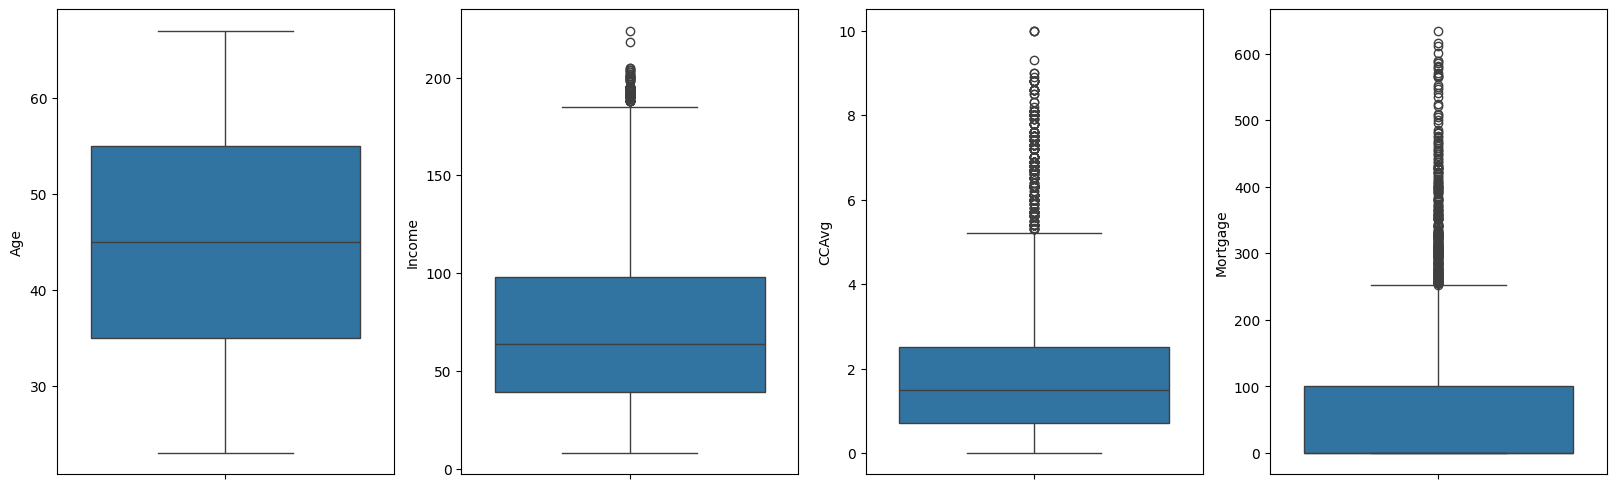

In [61]:
plt.figure(figsize=(20,35))
for i,numerical_column in enumerate(numerical_columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[numerical_column], whis=1.5)

We observe that `CC Avg`, `Income` and `Mortgage` have a number of outliers on the higher side.

In [62]:
# Function to treat outliers. 
def treat_outliers(data,col):
    Q1=data[col].quantile(0.25) # Calcuating 25th quantile
    Q3=data[col].quantile(0.75)  # Calcuating 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all higher values are assigned upper whisker
    return data

def treat_outliers_all(data, col_list):
    for c in col_list:
        data = treat_outliers(data,c)        
    return data

In [63]:
# Call the function to treat the outliers in the numerical columns
df = treat_outliers_all(df, numerical_columns)

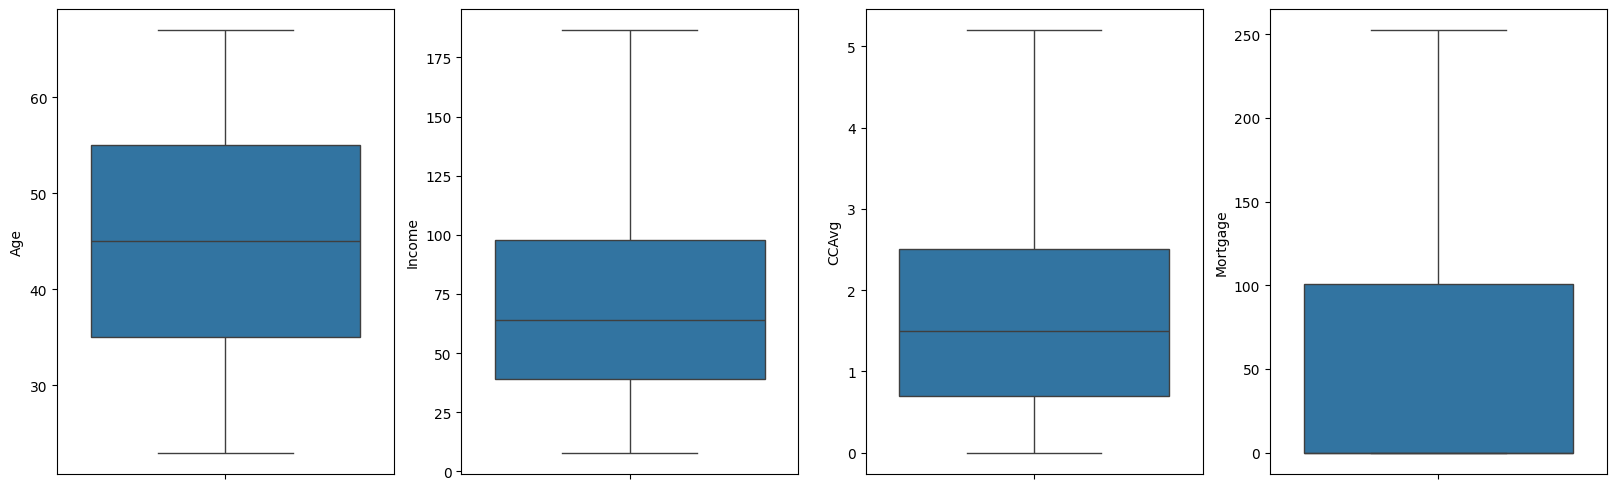

In [64]:
# Checking post outliers treatment
plt.figure(figsize=(20,35))
for i,numerical_column in enumerate(numerical_columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[numerical_column], whis=1.5)

From above, we see that all outliers have been removed.

## Model 1. Logistic Regression


### Model Evaluation Criterion

We are interested in predicting total number of customers who will take personal loan. 
We will use RECALL (Total Positive Rate) to evaluate model performance.

### Model Building

In [65]:
# Install the statsmodel library
%pip install statsmodels -q

Note: you may need to restart the kernel to use updated packages.


In [66]:
# Import the modules from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import statsmodels.api as sm

In [67]:
# Split training data and testing data. Ratio: 70%
X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3500, 12)
(3500,)
(1500, 12)
(1500,)


In [68]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
print(X_train)

logit = sm.Logit( y_train, X_train )
lg = logit.fit()

print(lg.summary())

# Checking Model Performance
y_pred_train = lg.predict(X_train) 
pred_train = list(map(round, y_pred_train))

y_pred_test = lg.predict(X_test) 
pred_test = list(map(round, y_pred_test))

      const    ID  Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
1334    1.0  1335   47    35.0    94304       2    1.3          1       0.0   
4768    1.0  4769   38    39.0    93118       1    2.0          2       0.0   
65      1.0    66   59   131.0    91360       1    3.8          1       0.0   
177     1.0   178   29    65.0    94132       4    1.8          2     244.0   
4489    1.0  4490   39    21.0    95518       3    0.2          2       0.0   
...     ...   ...  ...     ...      ...     ...    ...        ...       ...   
2895    1.0  2896   60    39.0    94501       4    1.3          2     140.0   
2763    1.0  2764   55    13.0    93943       4    0.7          1       0.0   
905     1.0   906   46    28.0    94720       1    1.0          1      84.0   
3980    1.0  3981   46    89.0    92866       4    1.4          2       0.0   
235     1.0   236   38    71.0    94720       4    1.8          3       0.0   

      Securities_Account  CD_Account  Online  Credi

In [69]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9571428571428572
Accuracy on test data: 0.9493333333333334
Recall on train data: 0.6676737160120846
Recall on test data: 0.6040268456375839
f1 score on train data: 0.7466216216216217
f1 score on test data: 0.7031249999999999


### Check model performance

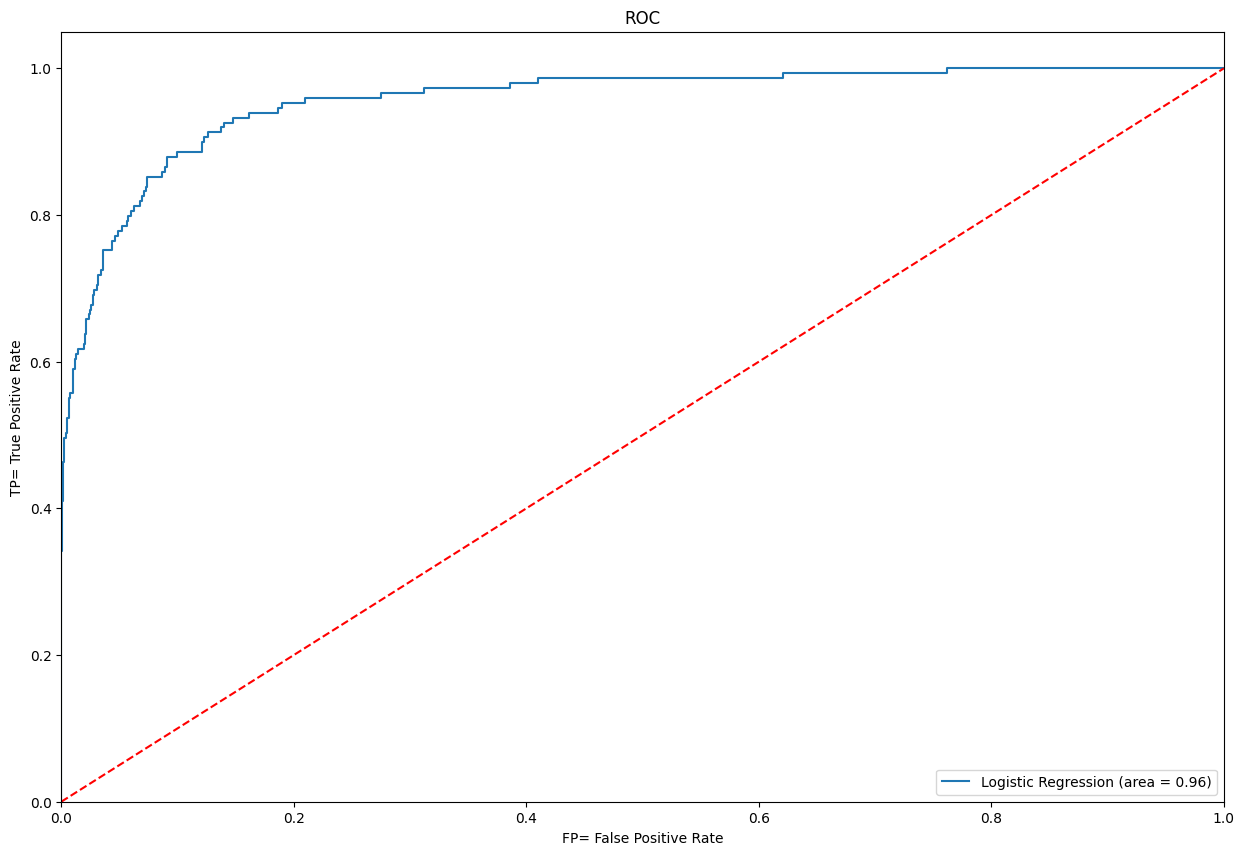

In [70]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylim([0.0, 1.05])
plt.xlabel('FP= False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylabel('TP= True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Improving Recall using AUC-ROC curve

In [71]:
# Let's improve the recall (True positives)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.0942129355352348


In [72]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [73]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9031428571428571
Accuracy on test data: 0.9053333333333333
Recall on train data: 0.9063444108761329
Recall on test data: 0.87248322147651
f1 score on train data: 0.6389776357827476
f1 score on test data: 0.6467661691542289


- Recall on test data is 87%.
- Accuracy on test data is 90.5%
- F1 score on test data is 64%

Let's look at Decision Tree model and how it compares with Logistic Regression

## Model 2. Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [75]:
# Building the decision tree model
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [76]:
##  Function to calculate recall score

def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set is: ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set is: ",metrics.recall_score(y_test,pred_test))

### Scoring Decision Tree

In [77]:
from sklearn import metrics

print('Accuracy on training set is:', dTree.score(X_train, y_train))
print('Accuracy on test set is:', dTree.score(X_test, y_test))

# Recall on train and test
get_recall_score(dTree)

Accuracy on training set is: 1.0
Accuracy on test set is: 0.982
Recall on training set is:  1.0
Recall on test set is:  0.8993288590604027


Both accuracy and Recall are 1. So this model is overfitting the data.

In [78]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.402286
Income              0.308769
Family              0.159077
CCAvg               0.059026
CD_Account          0.022684
ID                  0.018780
Age                 0.018125
ZIPCode             0.009585
Mortgage            0.001668
const               0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


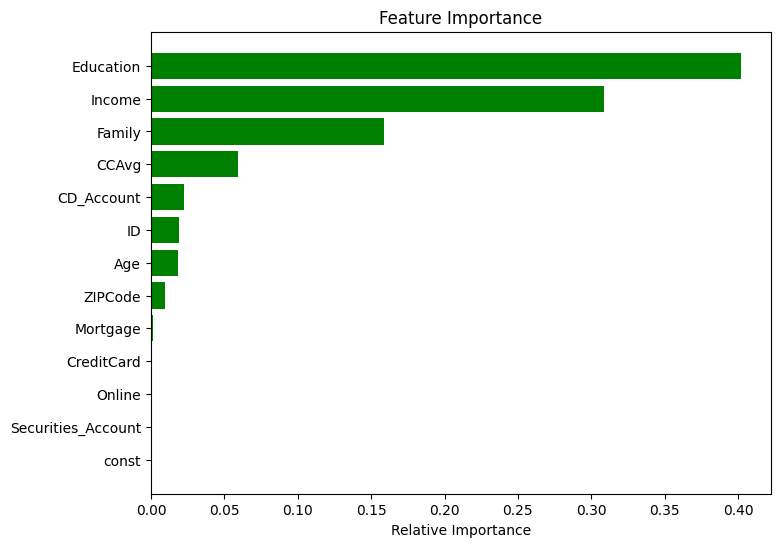

In [79]:
feature_names = list(X_train.columns)
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This shows that **Education** and **Income** are the most important variables.

In [80]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters 
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Scoring type used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Running the grid search
grid_object = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_object = grid_object.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_object.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

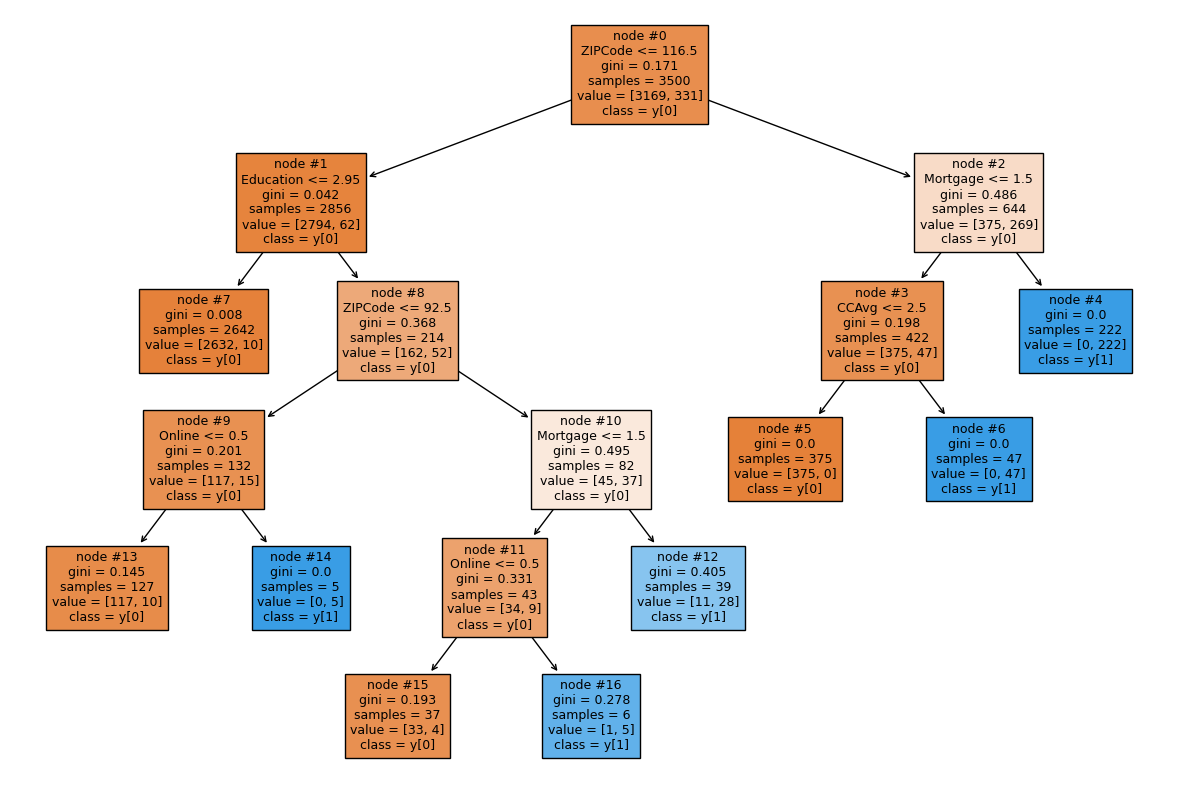

In [81]:
# Lets plot the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(estimator,feature_names=list(X.columns),filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [82]:
# Printing text report on decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [83]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set is:  0.9274924471299094
Recall on test set is:  0.8791946308724832
Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set is:  0.9274924471299094
Recall on test set is:  0.8791946308724832


- Accuracy on test data is 98%.
- Recall on test data is 87%.
Both numbers are good.

## Model Comparison and Final Model Selection

In [84]:
pd.DataFrame({'Model Name':['Logistic Regression','Decision tree with hyperparameter tuning'],
              'Training Recall':[0.921,0.927,], 
              'Testing Recall':[0.912,0.879], 
              'Testing Accuracy':[0.872,0.981]})

,Model Name,Training Recall,Testing Recall,Testing Accuracy
0,Logistic Regression,0.921,0.912,0.872
1,Decision tree with hyperparameter tuning,0.927,0.879,0.981


From above, we see that Logistic Regression has given a higher recall value. 
As our objective is to maximize Recall (True Positive rate), we will go with Logistic Regression as our final model.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

1. Bank can target below customer types in the personal loan compaign:
    - Higher average spending on credit cards (> $1.7K)
    - Higher income (> $60k)
    - Higher mortgage (> $50K)
    - Graduates and Advanced/Professionals
    - Family size of 3 and 4
    - Having Certificate of Deposit account and Securities account

2. Education and Income have emerged out as the most important features. Hence, bank can focus on customers with higher education and higher income.

3. Almost 50% of customers who had Certificate of Deposits account accepted personal loan in the first compaign. So, bank should encourage customers to open Certificate of Deposits that might convert them into personal loan customers.


___